# Predicting the mobile price using machine learning model

* Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

* He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

* Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.


## 1. Problem Defination
> How well can we predicat the price range of mobile, given its characteristics and previous example of how much phone have been sold on the besis of its characteristics. we will not predict actual price but a price range indicating how high the price is

## 2 Data
> The data is downloaded from kaggle: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

## 3 Evaluation
> If we can reach 90% accuracy at predicating the price range,we'll pursue the project.

## 4 Features
 This is where you'll get different information about each of the feature in your data.
 
 **Create Data dictionary**
 
* id - ID
* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth or not
* clock_speed - speed at which microprocessor executes instructions
* dual_sim - Has dual sim support or not
* fc - Front Camera mega pixels
* four_g - Has 4G or not
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Megabytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm
* talk_time - longest time that a single battery charge will last when you are
* three_g - Has 3G or not
* touch_screen - Has touch screen or not
* wifi - Has wifi or not 
* price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Preparing the tools
we're going to use pandas, Matplotlib, and Numpy for data analysis and manipulation

In [120]:
# All import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
# we want our plots to appear inside the notebook
%matplotlib inline 

# model from Scikit-learn

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#model evaluations
from sklearn.model_selection import train_test_split

#feature selection from scikit-learn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Load data

In [12]:
df=pd.read_csv('dataset/train.csv')
df.shape #(rows,columns)

(2000, 21)

## Data Exploration (Exploratory data analysis or EDA)

The goal is here to find out more about the data.

1. what question(s) are we trying to solve?
2. what kind of data we have and how do we treat diffrent types
3. what's missing from the data and how we deal with it.
5. How can we add,remove and change features to get more out of the data

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [14]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

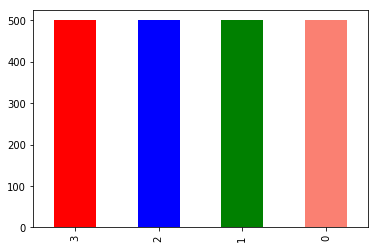

In [17]:
df['price_range'].value_counts().plot(kind='bar',color=['red','blue','green','salmon']);

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [18]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [19]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
# four-G frequency accoriding to price_range
df.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [22]:
#compare price_range with 4-G
pd.crosstab(df.price_range,df.four_g)    

four_g,0,1
price_range,,
0,241,259
1,238,262
2,253,247
3,225,275


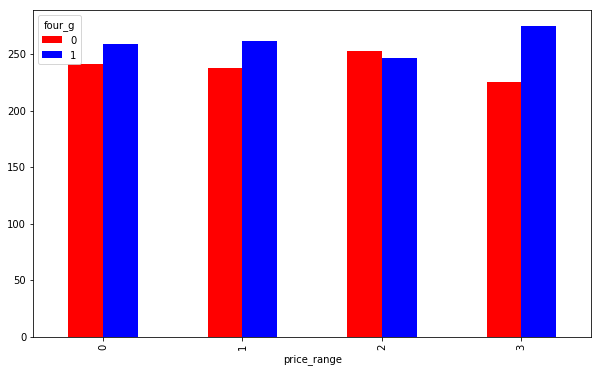

In [25]:
# create plot for crosstab
pd.crosstab(df.price_range,df.four_g).plot(kind='bar',figsize=(10,6),color=['red','blue','green','salmon'])

In [38]:
#convert ram mb to gb
df['ram_gb']=(df.ram/1024)+1
df['ram_gb']=df.ram_gb.astype(int)
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ram_gb
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,3
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,3
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,3
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,2
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1654,1067,17,1,10,1,0,0,1,2
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,1018,3220,13,8,18,1,0,1,3,4
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,1149,700,16,3,5,1,1,1,0,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,836,1099,17,1,20,1,0,0,0,2
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1224,513,19,10,12,1,0,0,0,1


In [39]:
# Ram frequency accoriding to price_range
df.ram_gb.value_counts()

3    556
2    540
4    498
1    406
Name: ram_gb, dtype: int64

In [40]:
#compare price_range with Ram
pd.crosstab(df.price_range,df.ram_gb)  

ram_gb,1,2,3,4
price_range,,,,
0,371,129,0,0
1,35,346,119,0
2,0,65,353,82
3,0,0,84,416


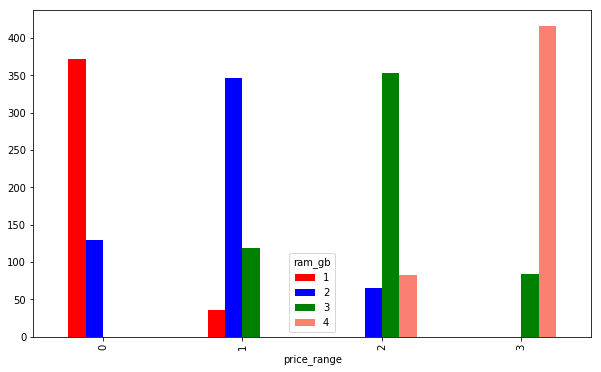

In [41]:
# create plot for crosstab
pd.crosstab(df.price_range,df.ram_gb).plot(kind='bar',figsize=(10,6),color=['red','blue','green','salmon'])

In [51]:
# % of Phones which support 3G
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values

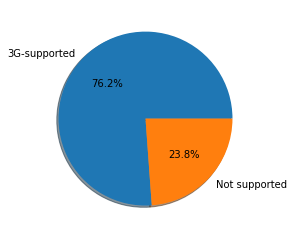

In [52]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

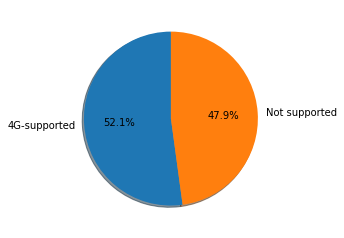

In [13]:
# % of Phones which support 4G
labels4g = ["4G-supported",'Not supported']
values4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Text(0.5, 0, 'MegaPixels')

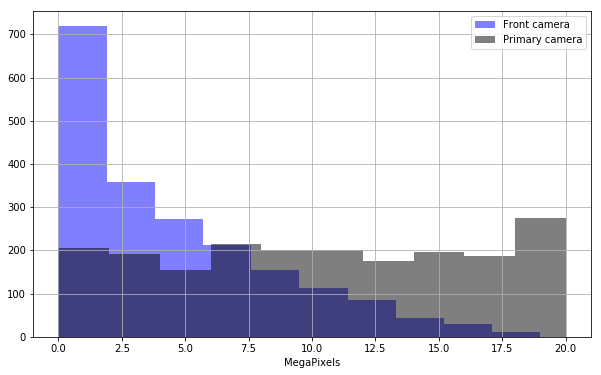

In [29]:
# No of Phones vs Camera megapixels of front and primary camera
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='black',label='Primary camera')
plt.legend(loc='best')
plt.xlabel('MegaPixels')

In [63]:
# Statistical tests can be used to select those features that have the strongest relationship with the output variable
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-2]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05869502 0.02102058 0.03676238 0.02287513 0.03285094 0.01923643
 0.03724314 0.03426118 0.03971505 0.03649614 0.03798632 0.04681131
 0.04619436 0.36236428 0.03648013 0.03827546 0.03731489 0.01593855
 0.01741561 0.02206309]


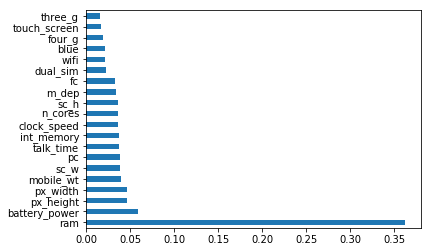

In [64]:
#plot graph of feature importances for better visualization
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## split the data into train and test set

In [65]:
X=df.drop(['three_g','touch_screen','four_g','blue','dual_sim','wifi','fc','m_dep','sc_h'],axis=1)
y=df['price_range']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Creating & Training Linear Regression Model

In [67]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)
lrm.score(X_test,y_test)

1.0

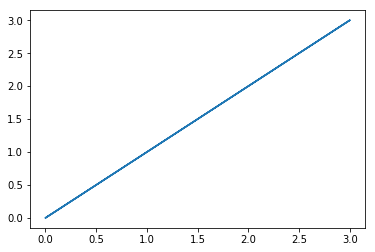

In [116]:
# result of Linear regression
y_pred=lrm.predict(X_test)
plt.plot(y_test,y_pred)

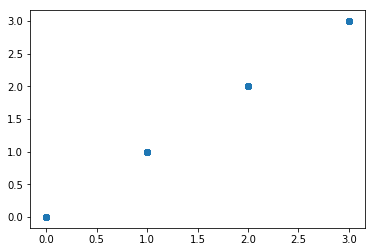

In [69]:
plt.scatter(y_test,y_pred)

## Creating & Training Logistic Regression Model

In [70]:
Logistic = LogisticRegression()
Logistic.fit(X_train,y_train)
Logistic.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.955

## Creating & Training Decision Tree Model

In [128]:
Tree_Model = DecisionTreeClassifier()
Tree_Model.fit(X_train,y_train)
Tree_Model.score(X_test,y_test)

1.0

In [129]:
# result of  Decision Tree Model
y_tree_predict=Tree_Model.predict(X_test)
y_tree_predict

array([0, 1, 1, 0, 3, 1, 2, 3, 2, 0, 2, 2, 3, 3, 0, 0, 1, 1, 1, 3, 0, 2,
       3, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 3, 3, 0, 0, 2, 2, 0, 1, 1, 2, 2,
       2, 3, 2, 3, 2, 1, 0, 1, 3, 0, 3, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 3, 1, 1, 3, 0, 0, 2, 2, 3, 2, 2, 1, 1, 3, 0, 2, 0, 0,
       3, 0, 3, 3, 3, 1, 0, 1, 1, 1, 0, 3, 0, 2, 1, 1, 2, 3, 3, 3, 0, 1,
       3, 1, 3, 2, 0, 2, 2, 2, 2, 1, 2, 3, 0, 3, 3, 2, 3, 3, 2, 2, 2, 0,
       3, 0, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2,
       1, 0, 3, 1, 0, 3, 3, 0, 3, 2, 3, 3, 0, 2, 0, 2, 2, 3, 3, 3, 3, 2,
       3, 0, 1, 0, 2, 3, 2, 2, 3, 2, 0, 0, 2, 0, 2, 1, 3, 2, 2, 2, 0, 0,
       1, 3, 0, 3, 3, 1, 1, 3, 1, 2, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 2, 0,
       2, 3, 3, 0, 2, 1, 1, 1, 3, 2, 1, 3, 0, 2, 2, 3, 3, 0, 1, 3, 2, 0,
       3, 1, 1, 3, 1, 2, 0, 1, 2, 3, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 0, 3,
       3, 2, 1, 2, 3, 2, 3, 0, 3, 3, 3, 1, 0, 1, 2, 1, 3, 1, 1, 1, 1, 0,
       3, 1, 3, 3, 0, 3, 3, 3, 1, 1, 1, 0, 2, 1, 2,

In [130]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
         'Linear Regression':LinearRegression(),
          'Decision Tree ':DecisionTreeClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [131]:

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.955,
 'KNN': 0.9275,
 'Random Forest': 1.0,
 'Linear Regression': 1.0,
 'Decision Tree ': 1.0}

## Model Comparison

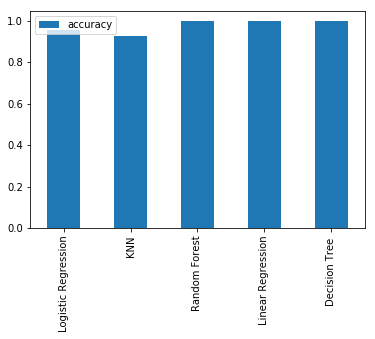

In [134]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [135]:
## Before Feature Extraction
X=df.drop(['price_range'],axis=1)
y=df['price_range']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [137]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
         'Linear Regression':LinearRegression(),
          'Decision Tree ':DecisionTreeClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [138]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.7825,
 'KNN': 0.905,
 'Random Forest': 0.7925,
 'Linear Regression': 0.9174680144292903,
 'Decision Tree ': 0.8325}

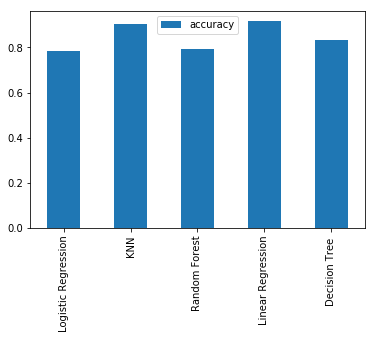

In [139]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();